# Ex 1

In [1]:
library(corrplot)

corrplot 0.90 loaded



In [4]:
install.packages('Amelia')
library(Amelia)


The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpbwsZJP/downloaded_packages


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [90]:
df = read.csv('../Du_lieu/diabetes.csv')
head(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [91]:
dim(df)

[1] 768   9

In [92]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [93]:
summary(df)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

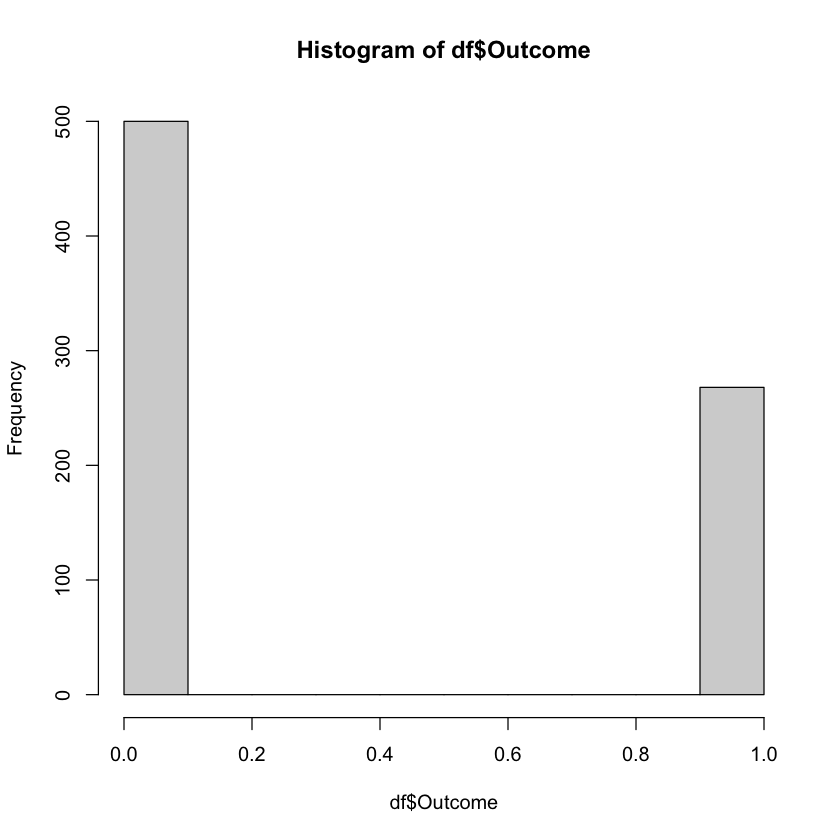

In [94]:
hist(df$Outcome)

Nhận xét: output không bị imbalance

In [95]:
correlation = cor(df[, 1:9])
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123,0.22189815
Glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432,0.46658140
BloodPressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795,0.06506836
SkinThickness,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026,0.07475223
Insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295,0.13054795
BMI,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187,0.29269466
DiabetesPedigreeFunction,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131,0.17384407
Age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000,0.23835598
Outcome,0.22189815,0.46658140,0.06506836,0.07475223,0.13054795,0.29269466,0.17384407,0.23835598,1.00000000


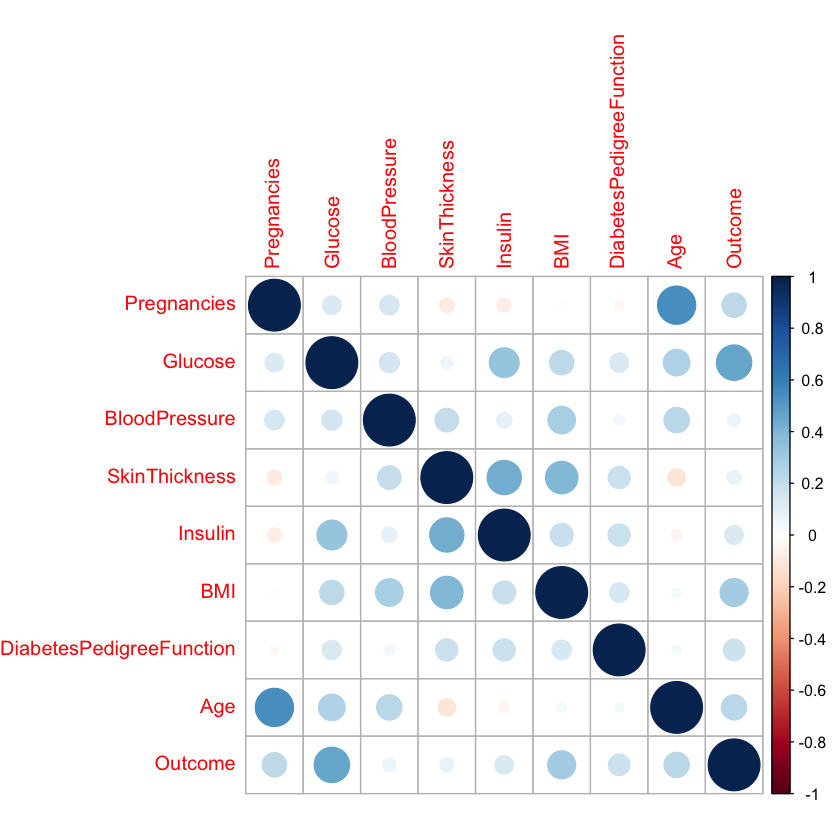

In [96]:
corrplot(correlation)

Nhận xét: ngoài 4 biến SkinThickness, BloodPressure, DiabetesPedigreeFunction, Insulin ít có mối liên hệ với Outcome, các biến còn lại có thể sử dụng cho model

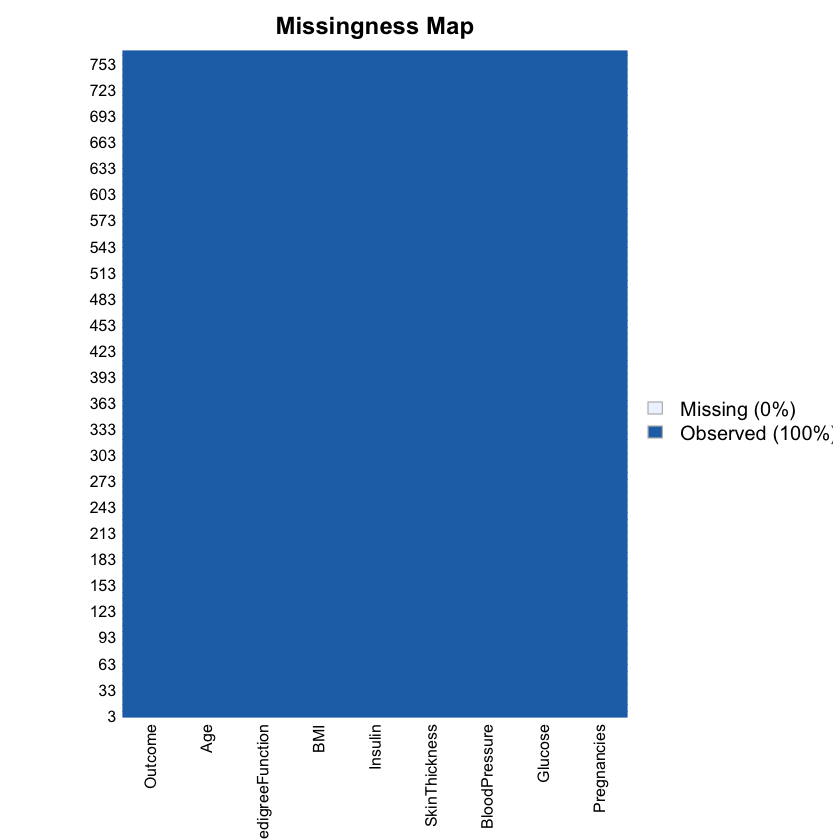

In [97]:
missmap(df)

Nhận xét: không có missing values

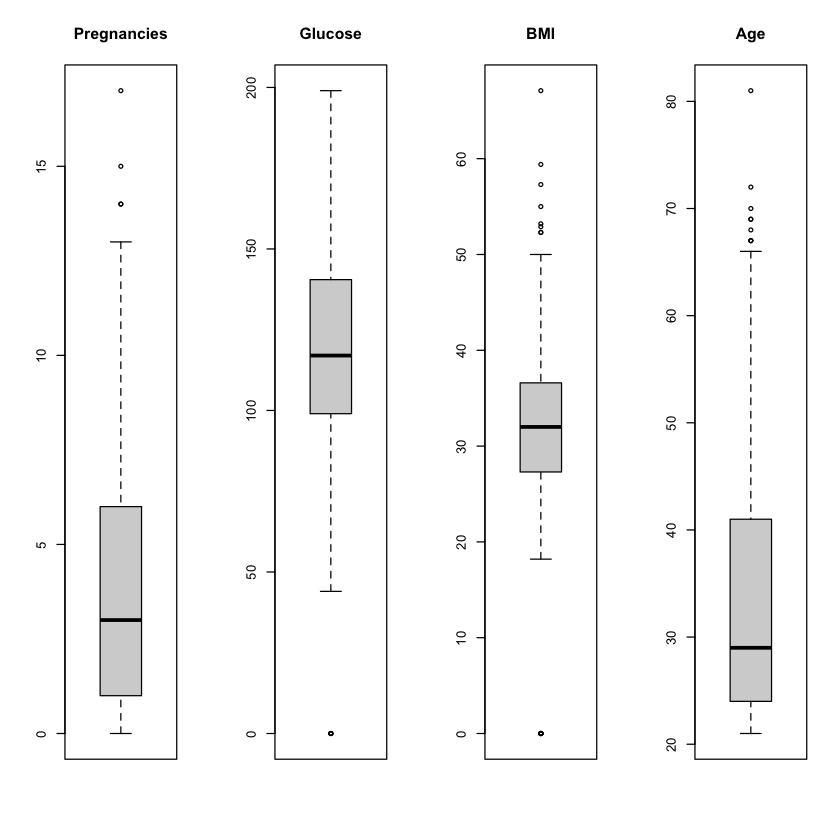

In [98]:
input_cols = c('Pregnancies', 'Glucose', 'BMI', 'Age')

par(mfrow = c(1, 4))
for (col in input_cols) {
    boxplot(df[, col], main = col)
}

In [99]:
for (col in input_cols) {
    outliers = boxplot.stats(df[, col])$out
    df = df[!(df[, col] %in% outliers), ]
}
dim(df)

[1] 732   9

In [100]:
set.seed(42)

train_idx = sample(1:nrow(df), 0.7*nrow(df))
train_df = df[train_idx,]
test_df = df[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 512   9
[1] 220   9


In [101]:
model = glm(Outcome ~ Pregnancies + Glucose + BMI + Age, data=train_df, family='binomial')
summary(model)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BMI + Age, family = "binomial", 
    data = train_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1785  -0.6989  -0.3883   0.6483   2.4269  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.94167    0.95029 -10.462  < 2e-16 ***
Pregnancies  0.11798    0.03989   2.957   0.0031 ** 
Glucose      0.03559    0.00446   7.981 1.46e-15 ***
BMI          0.10788    0.01935   5.576 2.46e-08 ***
Age          0.02218    0.01223   1.813   0.0698 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 646.59  on 511  degrees of freedom
Residual deviance: 465.89  on 507  degrees of freedom
AIC: 475.89

Number of Fisher Scoring iterations: 5


In [106]:
predictions = predict(model, newdata=test_df, type='response')
threshold = 0.5
predictions_label = ifelse(predictions > threshold, 1, 0)
confusion_matrix = table(predictions_label, test_df$Outcome)
confusion_matrix

                 
predictions_label   0   1
                0 118  36
                1  17  49

In [107]:
accuracy = mean(predictions_label == test_df$Outcome)
print(paste('Accuracy on test set:', round(accuracy*100,2), '%'))

[1] "Accuracy on test set: 75.91 %"


In [108]:
result = data.frame(Predictions = predictions_label, Actual_target = test_df$Outcome)
head(result)

,Predictions,Actual_target
,<dbl>,<int>
1,1,1
4,0,0
5,1,1
6,0,0
9,1,1
14,1,1


In [109]:
y = predict(model, newdata = data.frame(
                Pregnancies = c(8, 1, 12),
                Glucose = c(176, 100, 88),
                BMI = c(33.7, 23.6, 35.3),
                Age = c(58, 26, 48)), type = 'response')
y = ifelse(y > threshold, 1, 0)
y

1 2 3 
1 0 0

# Ex 2

In [126]:
df = read.csv('../Du_lieu/birthweight_reduced.csv')
head(df)

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
2,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
3,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
4,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
5,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
6,321,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal


Nhận xét: column lowbwt chính là dummy của column LowBirthWeight, với 1 là Low, 0 là Normal

In [127]:
dim(df)

[1] 42 17

In [128]:
str(df)

'data.frame':	42 obs. of  17 variables:
 $ id              : int  1313 431 808 300 516 321 1363 575 822 1081 ...
 $ headcirumference: int  12 12 13 12 13 13 12 12 13 14 ...
 $ length          : int  17 19 19 18 18 19 19 19 19 21 ...
 $ Birthweight     : num  5.8 4.2 6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 ...
 $ Gestation       : int  33 33 34 35 35 37 37 37 38 38 ...
 $ smoker          : int  0 1 0 1 1 0 1 1 0 0 ...
 $ motherage       : int  24 20 26 41 20 28 20 19 20 18 ...
 $ mnocig          : int  0 7 0 7 35 0 7 7 0 0 ...
 $ mheight         : int  58 63 65 65 67 62 64 65 62 67 ...
 $ mppwt           : int  99 109 140 125 125 118 104 132 103 109 ...
 $ fage            : int  26 20 25 37 23 39 20 20 22 20 ...
 $ fedyrs          : int  16 10 12 14 12 10 10 14 14 12 ...
 $ fnocig          : int  0 35 25 25 50 0 35 0 0 7 ...
 $ fheight         : int  66 71 69 68 73 67 73 72 70 67 ...
 $ lowbwt          : int  1 1 0 1 1 0 1 0 0 0 ...
 $ mage35          : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LowBirthWei

In [129]:
summary(df)

       id         headcirumference     length       Birthweight    
 Min.   :  27.0   Min.   :12.00    Min.   :17.00   Min.   : 4.200  
 1st Qu.: 537.2   1st Qu.:13.00    1st Qu.:19.00   1st Qu.: 6.450  
 Median : 821.0   Median :13.00    Median :20.00   Median : 7.250  
 Mean   : 894.1   Mean   :13.26    Mean   :19.93   Mean   : 7.264  
 3rd Qu.:1269.5   3rd Qu.:14.00    3rd Qu.:21.00   3rd Qu.: 8.000  
 Max.   :1764.0   Max.   :15.00    Max.   :22.00   Max.   :10.000  
   Gestation         smoker         motherage         mnocig      
 Min.   :33.00   Min.   :0.0000   Min.   :18.00   Min.   : 0.000  
 1st Qu.:38.00   1st Qu.:0.0000   1st Qu.:20.25   1st Qu.: 0.000  
 Median :39.50   Median :1.0000   Median :24.00   Median : 4.500  
 Mean   :39.19   Mean   :0.5238   Mean   :25.55   Mean   : 9.429  
 3rd Qu.:41.00   3rd Qu.:1.0000   3rd Qu.:29.00   3rd Qu.:15.750  
 Max.   :45.00   Max.   :1.0000   Max.   :41.00   Max.   :50.000  
    mheight         mppwt            fage          fedy

In [130]:
head(df)

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
2,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
3,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
4,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
5,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
6,321,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal


In [143]:
correlation = cor(df[, c(15, 2:14, 16)])
correlation

,lowbwt,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,mage35
lowbwt,1.00000000,-0.500246731,-0.59224820,-0.651804466,-0.602934976,0.25301216,-0.076393724,0.035383657,-0.20080064,-0.33887910,-0.24509537,-0.191273014,0.26601285,0.107236268,0.099339927
headcirumference,-0.50024673,1.000000000,0.56532849,0.736396310,0.443974538,-0.17375085,0.112108327,-0.131437996,0.38129342,0.35759351,0.30136346,0.083416559,-0.02773428,0.040466392,-0.005096869
length,-0.59224820,0.565328491,1.00000000,0.697008279,0.651402769,-0.23534939,-0.020718949,-0.157138028,0.41473145,0.30439408,0.07890718,-0.050722880,0.01971581,0.187137302,0.021074827
Birthweight,-0.65180447,0.736396310,0.69700828,1.000000000,0.706291950,-0.30895001,0.001040475,-0.151227745,0.36794704,0.38958065,0.17679000,0.073869580,-0.08892720,0.024784274,-0.108480485
Gestation,-0.60293498,0.443974538,0.65140277,0.706291950,1.000000000,-0.09474608,0.010778455,0.043194856,0.23092930,0.25051553,0.14217533,0.130986636,-0.11383061,0.187866905,0.007394508
smoker,0.25301216,-0.173750846,-0.23534939,-0.308950015,-0.094746078,1.00000000,0.212478786,0.727218092,0.03968201,0.01258798,0.19750145,-0.014890584,0.41763296,0.105835307,0.146938453
motherage,-0.07639372,0.112108327,-0.02071895,0.001040475,0.010778455,0.21247879,1.000000000,0.340294378,0.04678404,0.27764134,0.80658442,0.441682660,0.09092664,-0.203603248,0.692663889
mnocig,0.03538366,-0.131437996,-0.15713803,-0.151227745,0.043194856,0.72721809,0.340294378,1.000000000,0.17194248,0.15400811,0.24842538,0.198526204,0.25730739,0.008421145,0.290574154
mheight,-0.20080064,0.381293418,0.41473145,0.367947042,0.230929298,0.03968201,0.046784040,0.171942477,1.00000000,0.67124662,-0.07166439,0.016249430,0.04909595,0.272823984,0.108944153
mppwt,-0.33887910,0.357593509,0.30439408,0.389580646,0.250515534,0.01258798,0.277641336,0.154008114,0.67124662,1.00000000,0.25340070,0.187700894,0.05077141,0.108319605,0.147704096


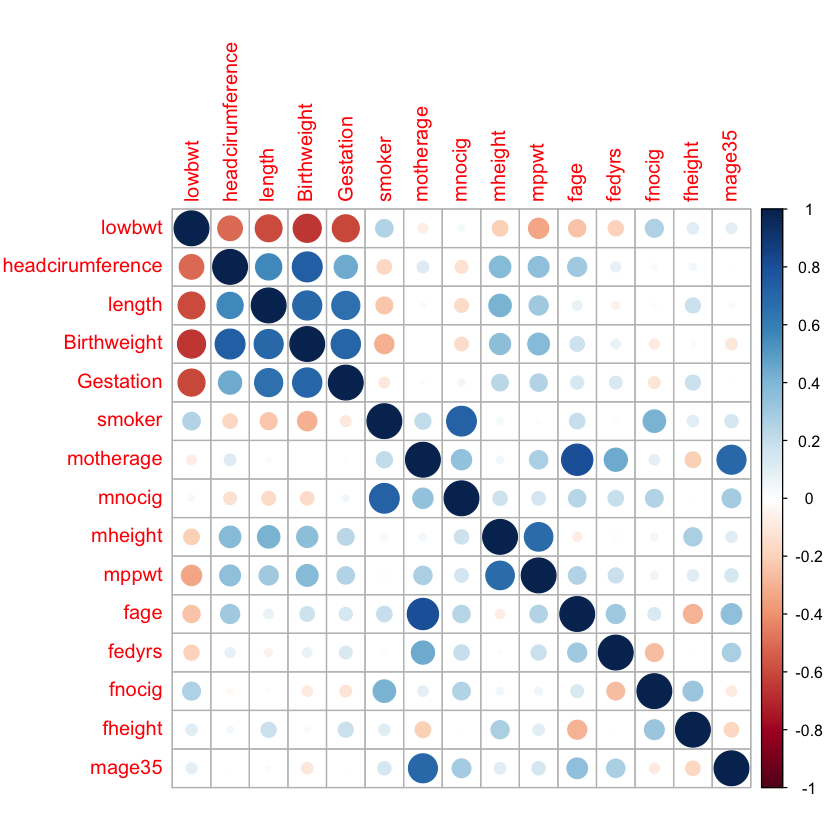

In [133]:
corrplot(correlation)

Nhận xét: Các biến có thể correlation tốt để đưa vào model là:
- headcirumference
- length
- Birthweight
- Gestation
- smoker
- mheight
- mppwt
- fage
- fedyrs
- fnocig

In [144]:
input_cols = c('headcirumference', 'length', 'Birthweight', 
               'Gestation', 'smoker', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig')

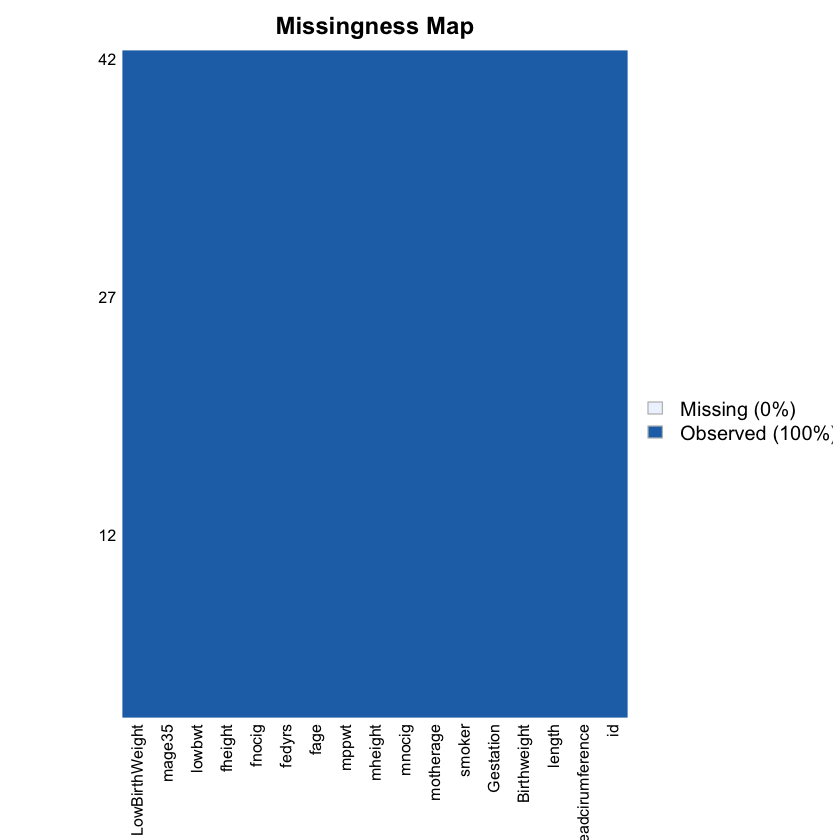

In [145]:
missmap(df)

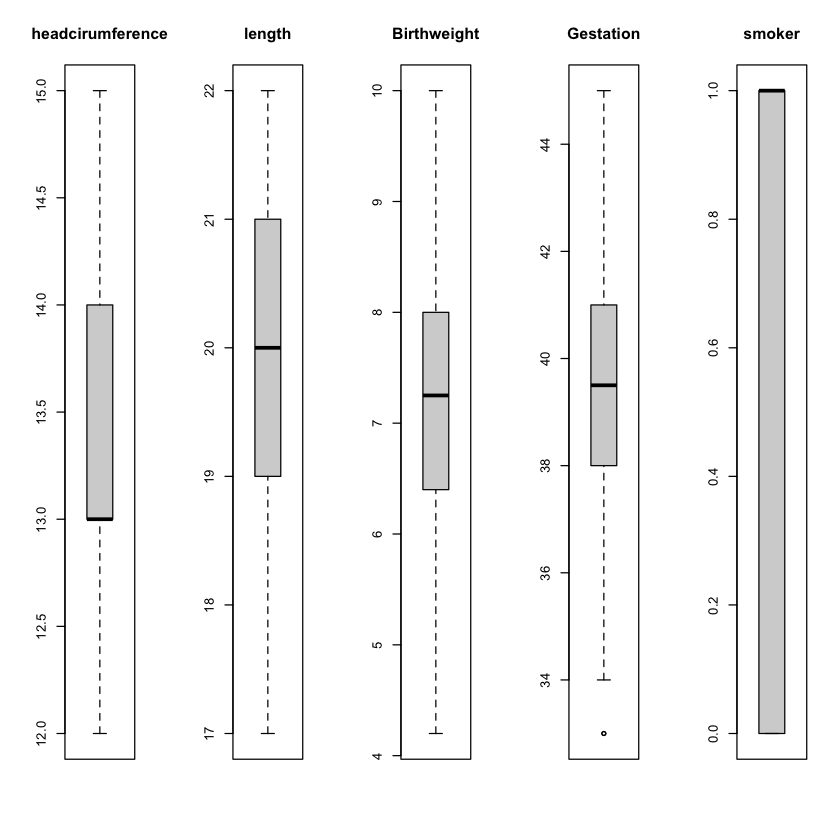

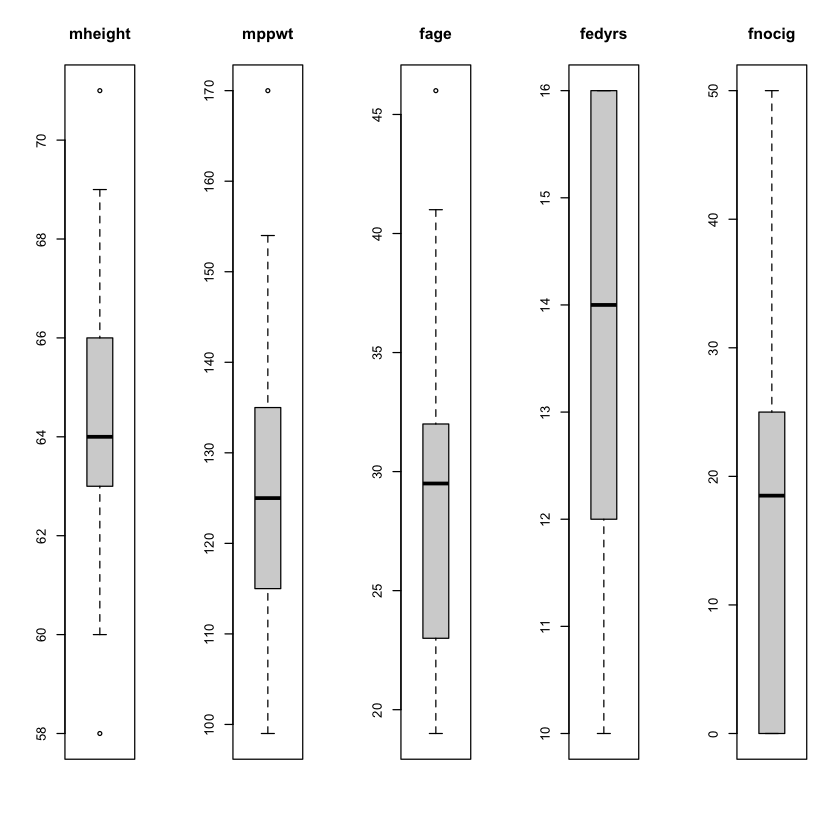

In [147]:
par(mfrow = c(1, 5))
for (col in input_cols) {
    boxplot(df[, col], main = col)
}

In [148]:
for (col in input_cols) {
    outliers = boxplot.stats(df[, col])$out
    df = df[!(df[, col] %in% outliers), ]
}
dim(df)

[1] 38 17

In [154]:
set.seed(42)

df_final = df[, append(input_cols, 'lowbwt')]
train_idx = sample(1:nrow(df_final), 0.7*nrow(df_final))
train_df = df_final[train_idx,]
test_df = df_final[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 26 11
[1] 12 11


In [155]:
model = glm(lowbwt ~ ., data=train_df, family='binomial')
summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = lowbwt ~ ., family = "binomial", data = train_df)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-6.002e-06  -3.305e-06  -8.695e-07  -2.110e-08   7.800e-06  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)      -2.885e+02  5.069e+06       0        1
headcirumference  4.369e+00  2.276e+05       0        1
length           -1.347e+01  1.892e+05       0        1
Birthweight      -2.232e+01  2.307e+05       0        1
Gestation         6.603e+00  7.723e+04       0        1
smoker           -2.404e+01  3.044e+05       0        1
mheight           7.792e+00  5.883e+04       0        1
mppwt            -9.623e-01  7.805e+03       0        1
fage              3.484e-01  1.119e+04       0        1
fedyrs           -1.287e+00  3.032e+04       0        1
fnocig            6.032e-01  6.106e+03       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.8597e+01  on 25  d

In [157]:
predictions = predict(model, newdata=test_df, type='response')
threshold = 0.5
predictions_label = ifelse(predictions > threshold, 1, 0)
confusion_matrix = table(predictions_label, test_df$lowbwt)
confusion_matrix

                 
predictions_label  0  1
                0 11  0
                1  0  1

In [158]:
accuracy = mean(predictions_label == test_df$lowbwt)
print(paste('Accuracy on test set:', round(accuracy*100,2), '%'))

[1] "Accuracy on test set: 100 %"


In [159]:
result = data.frame(Predictions = predictions_label, Actual_target = test_df$lowbwt)
head(result)

,Predictions,Actual_target
,<dbl>,<int>
8,0,0
13,0,0
19,1,1
20,0,0
22,0,0
24,0,0


In [160]:
y = predict(model, newdata = data.frame(
        headcirumference = c(12),
        length = c(18),
        Birthweight = c(4.5),
        Gestation = c(35),
        smoker = c(1), 
        motherage = c(41), 
        mnocig = c(7), 
        mheight = c(65), 
        mppwt = c(125), 
        fage = c(37),
        fedyrs = c(14), 
        fnocig = c(25),
        fheight = c(68), 
        lowbwt = c(1), 
        mage35 = c(1)), type = 'response')

y = ifelse(y > threshold, 0, 1)

y

1 
0

Nhận xét: 0 mean Normal, 1 mean Low